# CMSE 201 FINAL PROJECT
## Liam McNulty
#### April 25, 2023
### **What draft combine metrics are the best predictors for if a Quarterback will be successful in the NFL?**

#### Background and Motivation
##### Write Up
In this project I use NFL combine data along with all time leaders in yards per game, td percentage, and passer rating to attempt to determine which NFL combine metrics are the best predictors for if an NFL quarterback will succeed.

*To clarify, Passer rating is a metric determined by completions/attempts, passing yards/attempts, touchdowns/attempts, and interceptions/attempts*

*TD% is the percentage of touchdowns thrown when attempting to pass*

*Y/G is Yards gained per game played*
###### Limitations
- Only have combine data from 2000-2018. 
- Selected Response variables to determine success dont necessarily individually mean that an NFL QB is heavily successful. For example, a QB could have a high completion percentage but still not lead their team to many points. Lots of variables go in to QB success and there is no one metric to exactly say if a QB was successful or not

### Methodology
To answer this question I followed the guidelines below to use visualizations to determine correlation between a combine metric, and an indicator of success.
1. Data Wrangling. Create Arrays of matching QBs that include combine data and NFL metrics. 
2. Plot the NFL metric against a combine variable, and look for correlation in the graph
3. When the graph has correlation, plot a line of best fit with the method estimated based on the eye test

In [192]:
# Import Functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns

In [236]:
# Data Wrangling Combine Data
combine = pd.read_csv('combine_data.csv')
qbmask = combine['Pos'] == 'QB'
qbdata = combine[qbmask]
qbdata.reset_index(inplace=True)


In [237]:
PRleaders = pd.read_csv('PasserRating_leaders.csv')
TDperc_leaders = pd.read_csv('Tdperc_leaders.csv')
ypg_leaders = pd.read_csv('ypg_leaders.csv')

In [238]:
def sort_leaders(array):
    QBlist = qbdata['Player']
    yearmask = array['Start Year'] <= 2018 #Due to only having combine data from 2000-2018, their rookie year has
    yearmask2 = array['Start Year'] >= 2000 # To be between 2000-2018
    leaderarray = array[yearmask]
    leaderarray = leaderarray[yearmask2]
    leadermask = leaderarray['Player'].isin(QBlist) # Code based off code from https://www.geeksforgeeks.org/python-pandas-dataframe-isin/, obtained on April 24, 2023
    leaderarray = leaderarray[leadermask]
    leaderarray.sort_values(by=['Player'],ignore_index = True, inplace = True) # Sort by players
    leaderarray.reset_index(inplace=True) # Reset Index
    return leaderarray

def sort_combine(leaders):
    combinemask = qbdata['Player'].isin(leaders['Player']) # Code based off code from https://www.geeksforgeeks.org/python-pandas-dataframe-isin/, obtained on April 24, 2023
    combinesort = qbdata[combinemask] 
    combinesort.sort_values(by=['Player'], inplace = True)
    combinesort.reset_index(inplace=True)
    return combinesort
    

In [239]:
PRleaders = sort_leaders(PRleaders)
TDperc_leaders = sort_leaders(TDperc_leaders)
ypg_leaders = sort_leaders(ypg_leaders)
PRcombine = sort_combine(PRleaders)
TDcombine = sort_combine(TDperc_leaders)
YPGcombine = sort_combine(ypg_leaders)



<ipython-input-238-a8197df31102>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  leaderarray = leaderarray[yearmask2]
<ipython-input-238-a8197df31102>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  leaderarray = leaderarray[yearmask2]
<ipython-input-238-a8197df31102>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  leaderarray = leaderarray[yearmask2]
<ipython-input-238-a8197df31102>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combinesort.sort_values(by=['Player'], inplace = True)


In [240]:
# Set TD Percentage as a float rather than a string
TDperc_leaders['TD%'] = TDperc_leaders['TD%'].str.replace('%','')
TDperc_leaders['TD%'] = TDperc_leaders['TD%'].astype(float)

In [241]:
def plotting(leaders, combine, stat, title):
    metrics = ['Forty', 'Vertical', 'BroadJump', 'Cone', 'Shuttle']
    titles = ['40 yd dash time (s)', 'Vertical Jump (in)', 'Broad Jump (in)', '3 Cone Drill time (s)', 'Shuttle Run Time (s)']
    plt.figure(figsize = [12,12])
    for i in range(len(metrics)):
        plt.subplot(2,3,i+1)
        plt.scatter(combine[metrics[i]], leaders[stat])
        plt.xlabel(titles[i])
        plt.ylabel(title)
    plt.tight_layout()
    plt.savefig(title + '.png')

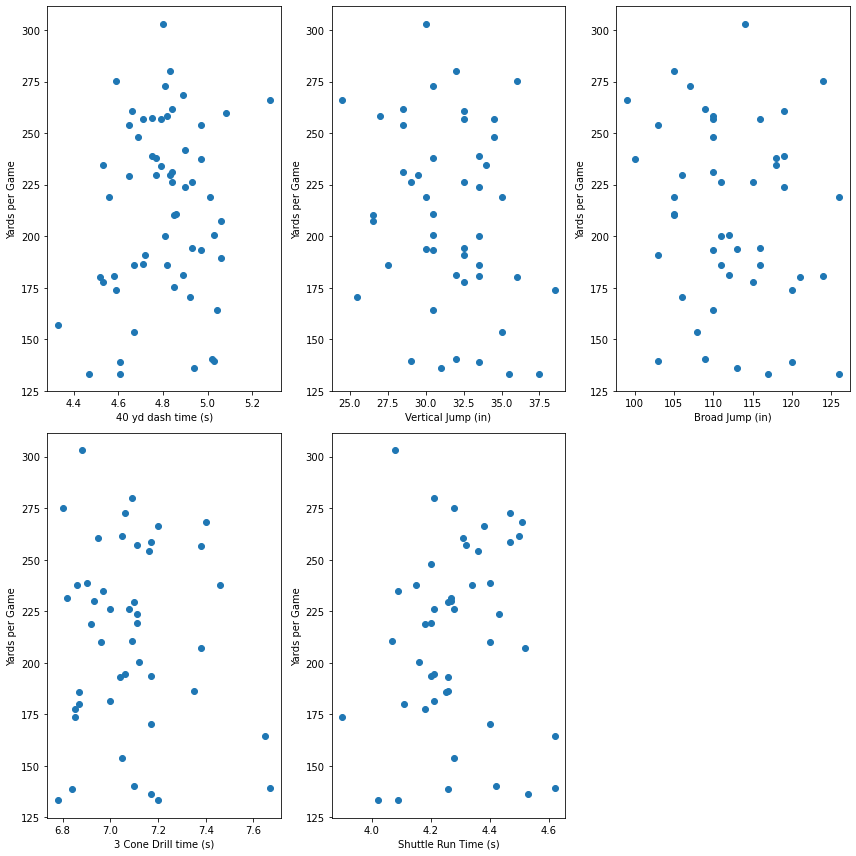

In [242]:
plotting(ypg_leaders, YPGcombine, 'Y/G', 'Yards per Game')

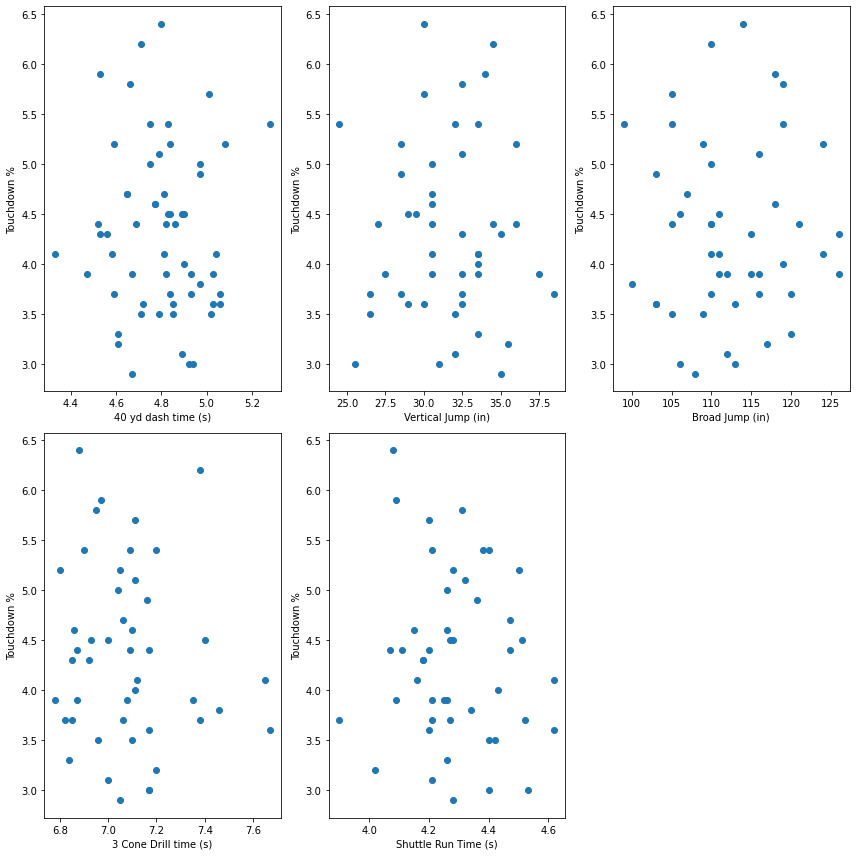

In [243]:
plotting(TDperc_leaders, TDcombine, 'TD%', 'Touchdown %')

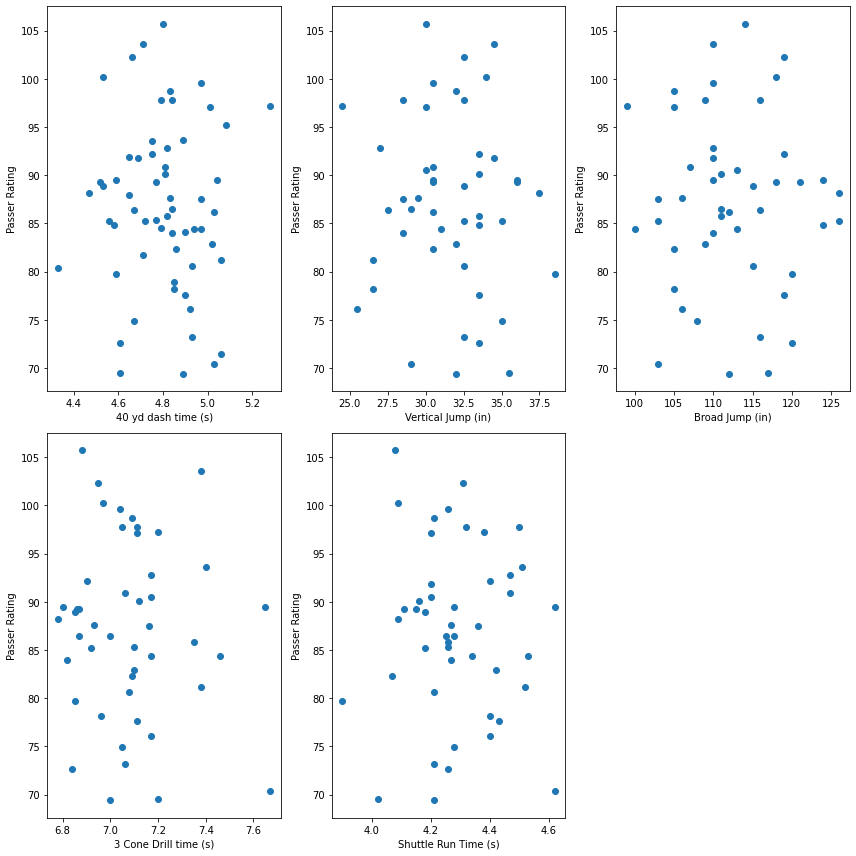

In [244]:
plotting(PRleaders, PRcombine, 'Rate', 'Passer Rating')

#### STRONG LACK OF CORRELATION IN MOST GRAPHS
#### Time to explore the few graphs with correlation and plot lines

In [245]:
def linear_regression(x, m, b):
    return m*x + b

In [250]:
parameters, ignore = curve_fit(linear_regression, PRcombine['Shuttle'], PRleaders['Rate'], p0 = [20, 0])
yguess = linear_regression(PRcombine['Shuttle'], parameters[0], parameters[1])

/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


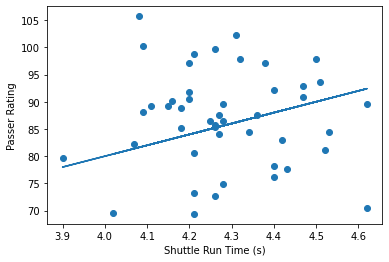

In [251]:
plt.scatter(PRcombine['Shuttle'],PRleaders['Rate'])
plt.plot(PRcombine['Shuttle'], yguess)
plt.xlabel('Shuttle Run Time (s)')
plt.ylabel('Passer Rating')
plt.savefig('PRvsShuttle.png')


In [252]:
parameters, ignore = curve_fit(linear_regression, TDcombine['Shuttle'], TDperc_leaders['TD%'], p0 = [-4, 21.5])
yguess = linear_regression(TDcombine['Shuttle'], parameters[0], parameters[1])

/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


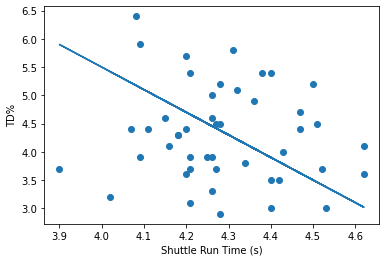

In [253]:
plt.scatter(TDcombine['Shuttle'], TDperc_leaders['TD%'])
plt.plot(TDcombine['Shuttle'], yguess)
plt.xlabel('Shuttle Run Time (s)')
plt.ylabel('TD%')
plt.savefig('TDvsShuttle.png')

**As seen in the figures above, these plots lack a strong correlation. Given how similar the plots look to the other created plots, we can assume that the plots all lack a strong correlation. In the rest of this project, I have decided to see which combine metrics have the most correlation to being a higher draft pick**

Text(0, 0.5, 'Vertical Jump (in)')

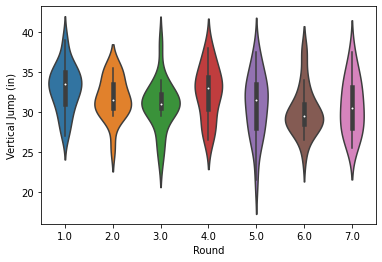

In [215]:
# Code based off of code found on https://seaborn.pydata.org/examples/grouped_violinplots.html, obtained on April 24, 2023
sns.violinplot(data = qbdata, x = 'Round', y = 'Vertical')
plt.ylabel('Vertical Jump (in)')

Text(0, 0.5, 'Broad Jump (in)')

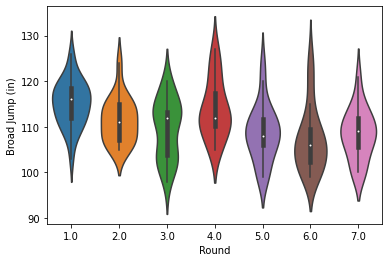

In [254]:
# Code based off of code found on https://seaborn.pydata.org/examples/grouped_violinplots.html, obtained on April 24, 2023
sns.violinplot(data = qbdata, x = 'Round', y = 'BroadJump')
plt.ylabel('Broad Jump (in)')


**As seen in the above plots, there seems to be a correlation between the combine metrics and when players are drafted, especially between rounds 1 to 3. I decided to further explore rounds 1 to 3. I Think that after round 3, the level of prospects diminshes so scouts start using more athletic metrics to determine who they should draft**

In [255]:
roundmask = qbdata['Round'] <= 3
before4 = qbdata[roundmask]

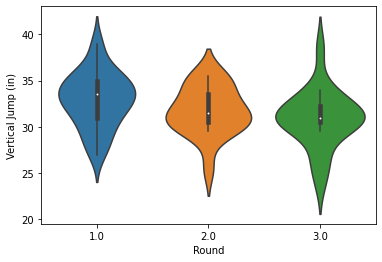

In [256]:
# Code based off of code found on https://seaborn.pydata.org/examples/grouped_violinplots.html, obtained on April 24, 2023
sns.violinplot(data = before4, x = 'Round', y = 'Vertical')
plt.ylabel('Vertical Jump (in)')
plt.savefig('RoundvsVertviolin.png')

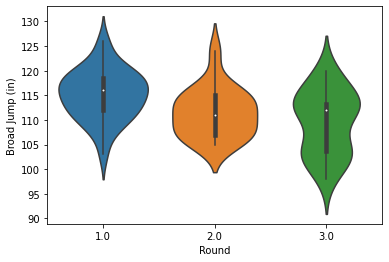

In [257]:
# Code based off of code found on https://seaborn.pydata.org/examples/grouped_violinplots.html, obtained on April 24, 2023
sns.violinplot(data = before4, x = 'Round', y = 'BroadJump')
plt.ylabel('Broad Jump (in)')
plt.savefig('RoundvsBroadviolin.png')

### Results
When carrying out the methods. There was a strong lack of correlation between any combine metrics and the variables I chose to represent success of an NFL QB. That is evidenced in the scatter plots below

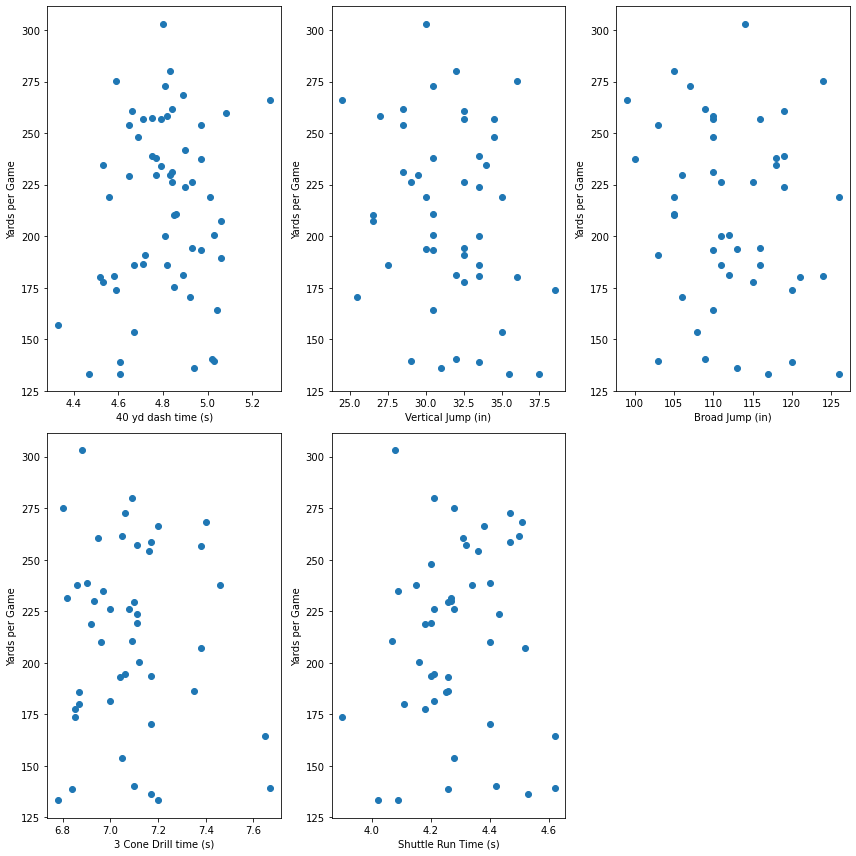

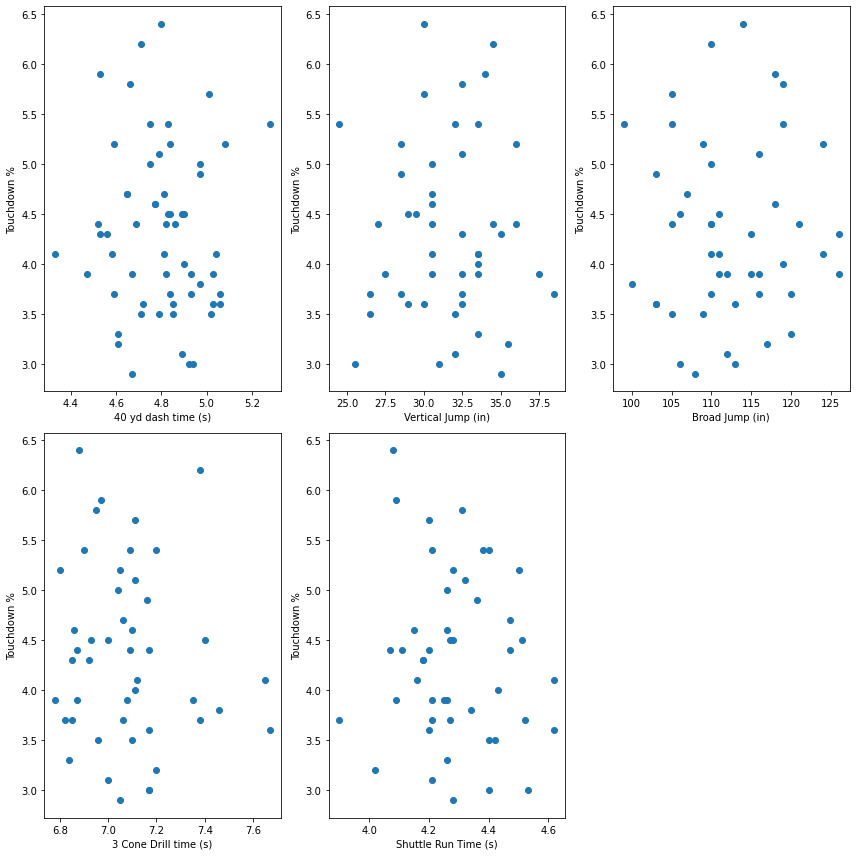

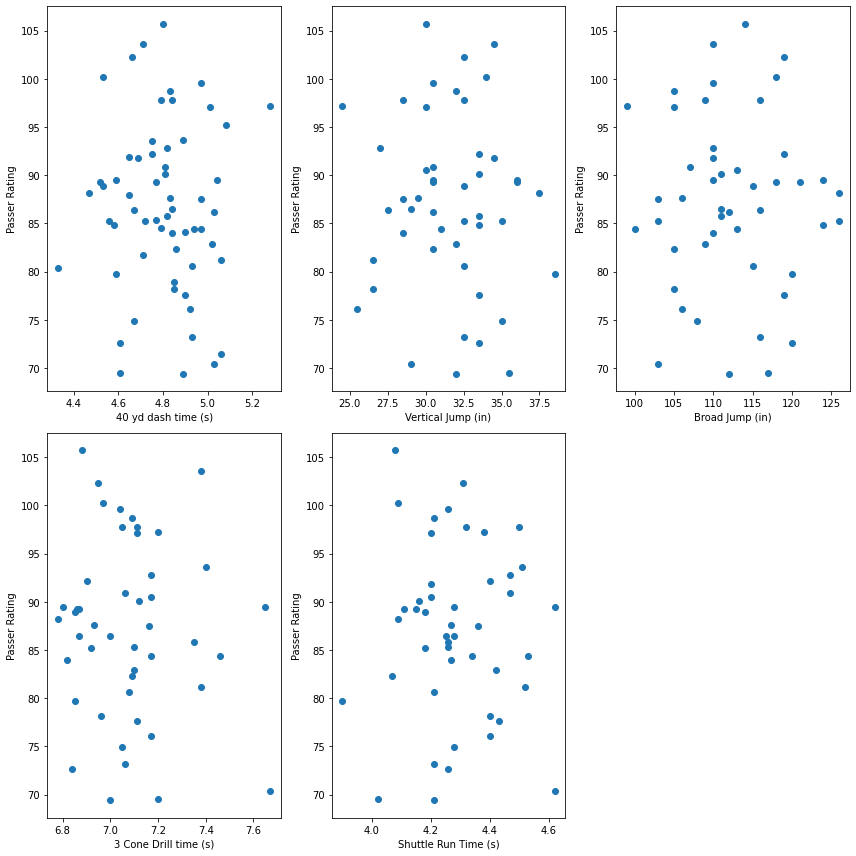

In [258]:
plotting(ypg_leaders, YPGcombine, 'Y/G', 'Yards per Game')
plotting(TDperc_leaders, TDcombine, 'TD%', 'Touchdown %')
plotting(PRleaders, PRcombine, 'Rate', 'Passer Rating')

The few plots that demonstrated any sort of correlation was very minor, and I decided the best way to explore this correlation was through a linear model. As seen below, there is a slight linear correlation between the Combine shuttle run and 2 success variables which are TD% and Passer Rating

/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Text(0, 0.5, 'Touchdown %')

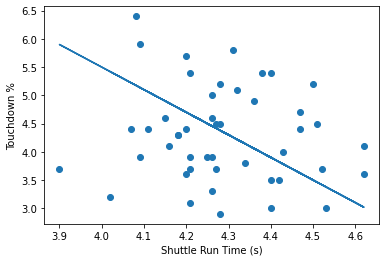

In [259]:
parameters, ignore = curve_fit(linear_regression, TDcombine['Shuttle'], TDperc_leaders['TD%'], p0 = [-4, 21.5])
yguess = linear_regression(TDcombine['Shuttle'], parameters[0], parameters[1])
plt.scatter(TDcombine['Shuttle'], TDperc_leaders['TD%'])
plt.plot(TDcombine['Shuttle'], yguess)
plt.xlabel('Shuttle Run Time (s)')
plt.ylabel('Touchdown %')

/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Text(0, 0.5, 'Passer Rating')

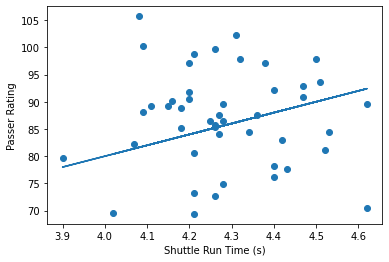

In [260]:
parameters, ignore = curve_fit(linear_regression, PRcombine['Shuttle'], PRleaders['Rate'], p0 = [20, 0])
yguess = linear_regression(PRcombine['Shuttle'], parameters[0], parameters[1])
plt.scatter(PRcombine['Shuttle'],PRleaders['Rate'])
plt.plot(PRcombine['Shuttle'], yguess)
plt.xlabel('Shuttle Run Time (s)')
plt.ylabel('Passer Rating')

After discovering that my question did not have a definitive answer based on the data which I currently have, I decided to adjust what I was looking for in my project. I decided to test which combine metrics had correlation to which round Quarterback prospects are drafted. I explored this data through violin plots, which show density of one variable in comparison to another. After sorting through the data, I recognized that there was correlation from rounds 1 to 3, but it was thrown off after round four. I came to the conclusion that this was due to prospects having less experience and not being seen to be as talented as Quarterbacks drafted in the first 3 rounds. I decided to explore the violin plots from rounds 1 to 3. I found that Vertical and Broad jump had the most correlation to which round a player would be drafted in. These Plots are displayed below

Text(0, 0.5, 'Vertical Jump (in)')

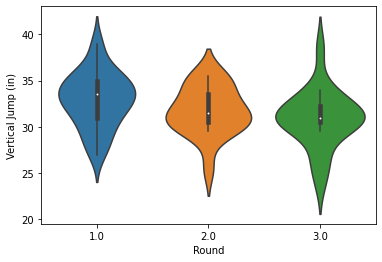

In [261]:
# Code based off of code found on https://seaborn.pydata.org/examples/grouped_violinplots.html, obtained on April 24, 2023
sns.violinplot(data = before4, x = 'Round', y = 'Vertical')
plt.ylabel('Vertical Jump (in)')

Text(0, 0.5, 'Broad Jump (in)')

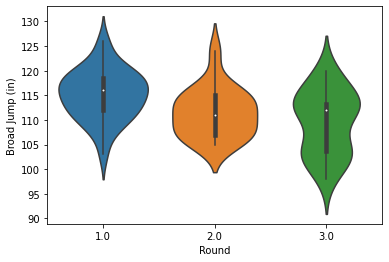

In [262]:
# Code based off of code found on https://seaborn.pydata.org/examples/grouped_violinplots.html, obtained on April 24, 2023
sns.violinplot(data = before4, x = 'Round', y = 'BroadJump')
plt.ylabel('Broad Jump (in)')

As can be seen in the plots above, Quarterbacks drafted in round 1 have a higher median, IQR, range, and max for both broad jump and vertical jump than those drafted in round 2. The same can be said from round 2 to 3. In general, the data for those drafted in round 1 is the most condensed of the three rounds. 

### Conclusions
- Original question of combine vs QB success does not seem to be answered from this dataset
- As Shuttle time increases, Passer rating also seems to slightly increase by about 20 points per second. 
- As shuttle time increases, Touchdown Percentage seems to decrease by about -4% per second.
- Decided to answer new question about which combine metrics lead to a Quarterback being drafted in an earlier round
- Found that After the 3rd round, athleticism matters a lot more. Decided that this was due to teams being more willing to "waste" picks, and base the picks off potential rather than college success
- Explored first 3 rounds, found that as their athleticism increased QB's would be drafted in earlier rounds. Athletic QBs are starting to have more success in the league than pocket passers, so this conclusion makes sense
#### Obstacles
- Not a lot of data, only about 60 quarterbacks fit into the leader lists and the combine lists
- *This was somewhat fixed by exploring the new question, as I now had 300+ quarterbacks data, including QBs that went undrafted
#### What I would do differently
- Explore a different position. I feel like athleticism matters more for positions such as RB, DB, WR, etc.
- Explore how much different combine metrics matter for different positions. For example I would assume bench press matters a lot more for D-Linemen than Quarterbacks.

### References
“NFL Passer Rating Career Leaders.” Pro Football Reference, https://www.pro-football-reference.com/leaders/pass_rating_career.htm. 

“NFL Passing Touchdown % Career Leaders.” Pro Football Reference, https://www.pro-football-reference.com/leaders/pass_td_perc_career.htm. 

“NFL Passing Yards per Game Career Leaders.” Pro Football Reference, https://www.pro-football-reference.com/leaders/pass_yds_per_g_career.htm. 

T., Savvas. “NFL Combine Data.” Kaggle, 26 Apr. 2018, https://www.kaggle.com/datasets/savvastj/nfl-combine-data. 